In [38]:
#profitableHospital-project - KNN Model

In [39]:
#dependencies
import pandas as pd

import requests
import json
from config import gkey

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

import tensorflow
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import joblib

In [40]:
#initial file read
df = pd.read_csv("2017targetedmain.csv")
df.head()

,Profit Score,Profit %,CON,Urban,Provider Type,Type of Control,FTE - Employees on Payroll,Number of Beds,Total Discharges (V + XVIII + XIX + Unknown),Cost of Charity Care,...,Total Costs,Total fixed Assets,Total Long Term Liabilities,Inpatient Revenue,Outpatient Revenue,Gross Revenue,Inpatient %,Outpatient %,Charity %,Uncompensated %
0,1,0.122992,1.0,1.0,1,2,322.10,70.0,435.0,26358.0,...,7704339.0,9205205.0,5012389.0,6691433.0,14763631.0,21455064.0,0.311881,0.688119,0.001229,0.001229
1,3,-0.037184,1.0,2.0,1,9,923.39,155.0,2110.0,782377.0,...,39198497.0,61187548.0,672577.0,64929188.0,101005874.0,165935062.0,0.391293,0.608707,0.004715,0.004715
2,3,-0.090105,1.0,2.0,1,2,378.26,49.0,632.0,14670.0,...,20033059.0,65893849.0,34152807.0,16852176.0,44004253.0,60856429.0,0.276917,0.723083,0.000241,0.000241
3,3,-0.021699,1.0,1.0,1,2,693.11,48.0,1422.0,1989303.0,...,43205601.0,-1046227.0,11247.0,39423493.0,74054548.0,113478041.0,0.347411,0.652589,0.017530,0.017530
4,2,0.018523,1.0,1.0,1,2,1452.05,268.0,9188.0,9740925.0,...,222474406.0,177612000.0,125362000.0,358393348.0,625072412.0,983465760.0,0.364419,0.635581,0.009905,0.009905


In [41]:
#df.dtypes

In [42]:
#df['Profit %'] = pd.to_numeric(df['Profit %'])

In [43]:
#df['Profit %'].dtype

In [44]:
#df1 = df.loc[df["Profit %"] <= .0915]

In [45]:
#df2 = df1.loc[df["Profit %"] >= -.0656]

In [46]:
df2 = df

In [67]:
# Select features to be used as x values
features2 = df2[['CON', 'Urban','Number of Beds','Total Discharges (V + XVIII + XIX + Unknown)','Outpatient Revenue', 'Gross Revenue', 'Total Costs', 'Charity %', 'Uncompensated %']]
features2.head()

,CON,Urban,Number of Beds,Total Discharges (V + XVIII + XIX + Unknown),Outpatient Revenue,Gross Revenue,Total Costs,Charity %,Uncompensated %
0,1.0,1.0,70.0,435.0,14763631.0,21455064.0,7704339.0,0.001229,0.001229
1,1.0,2.0,155.0,2110.0,101005874.0,165935062.0,39198497.0,0.004715,0.004715
2,1.0,2.0,49.0,632.0,44004253.0,60856429.0,20033059.0,0.000241,0.000241
3,1.0,1.0,48.0,1422.0,74054548.0,113478041.0,43205601.0,0.017530,0.017530
4,1.0,1.0,268.0,9188.0,625072412.0,983465760.0,222474406.0,0.009905,0.009905


In [68]:
df2['Profit Score'].value_counts()

2    1908
3     954
1     954
Name: Profit Score, dtype: int64

In [69]:
y = df2[['Profit Score']]

In [70]:
X = features2

In [71]:
#Create a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [72]:
y_train.shape

(2862, 1)

In [73]:
X_train.shape

(2862, 9)

In [74]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 1, Train/Test Score: 1.000/0.436
k: 3, Train/Test Score: 0.692/0.443


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 5, Train/Test Score: 0.626/0.477
k: 7, Train/Test Score: 0.616/0.485


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 9, Train/Test Score: 0.598/0.487
k: 11, Train/Test Score: 0.580/0.492


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 13, Train/Test Score: 0.582/0.504
k: 15, Train/Test Score: 0.576/0.506


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 17, Train/Test Score: 0.568/0.514
k: 19, Train/Test Score: 0.566/0.508


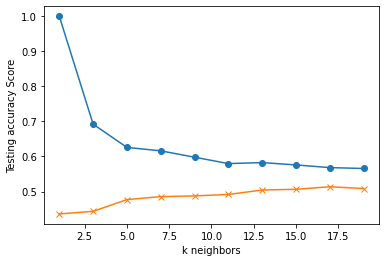

In [75]:
# Create the for loop and KNN model
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [76]:
# Review a range of K values for most efficient accuracy
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=15 Test Acc: 0.506


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [77]:
# Review a range of K values for most efficient accuracy
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.485


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [78]:
# Create the KNN model for GridSearchCV enhancement
#from sklearn.svm import SVC 
modelc = KNeighborsClassifier(n_neighbors=11)
modelc

KNeighborsClassifier(n_neighbors=11)

In [79]:
# Train the model with GridSearch
param_grid = {'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [15, 20, 30]}
gridc = GridSearchCV(modelc, param_grid, verbose=3)

In [80]:
gridc.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..............algorithm=ball_tree, leaf_size=15; total time=   0.0s
[CV 2/5] END ..............algorithm=ball_tree, leaf_size=15; total time=   0.0s
[CV 3/5] END ..............algorithm=ball_tree, leaf_size=15; total time=   0.0s
[CV 4/5] END ..............algorithm=ball_tree, leaf_size=15; total time=   0.0s
[CV 5/5] END ..............algorithm=ball_tree, leaf_size=15; total time=   0.0s
[CV 1/5] END ..............algorithm=ball_tree, leaf_size=20; total time=   0.0s


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when

[CV 2/5] END ..............algorithm=ball_tree, leaf_size=20; total time=   0.0s
[CV 3/5] END ..............algorithm=ball_tree, leaf_size=20; total time=   0.0s
[CV 4/5] END ..............algorithm=ball_tree, leaf_size=20; total time=   0.0s
[CV 5/5] END ..............algorithm=ball_tree, leaf_size=20; total time=   0.0s
[CV 1/5] END ..............algorithm=ball_tree, leaf_size=30; total time=   0.0s
[CV 2/5] END ..............algorithm=ball_tree, leaf_size=30; total time=   0.0s
[CV 3/5] END ..............algorithm=ball_tree, leaf_size=30; total time=   0.0s


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when

[CV 4/5] END ..............algorithm=ball_tree, leaf_size=30; total time=   0.0s
[CV 5/5] END ..............algorithm=ball_tree, leaf_size=30; total time=   0.0s
[CV 1/5] END ................algorithm=kd_tree, leaf_size=15; total time=   0.0s
[CV 2/5] END ................algorithm=kd_tree, leaf_size=15; total time=   0.0s
[CV 3/5] END ................algorithm=kd_tree, leaf_size=15; total time=   0.0s
[CV 4/5] END ................algorithm=kd_tree, leaf_size=15; total time=   0.0s


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when

[CV 5/5] END ................algorithm=kd_tree, leaf_size=15; total time=   0.0s
[CV 1/5] END ................algorithm=kd_tree, leaf_size=20; total time=   0.0s
[CV 2/5] END ................algorithm=kd_tree, leaf_size=20; total time=   0.0s
[CV 3/5] END ................algorithm=kd_tree, leaf_size=20; total time=   0.0s
[CV 4/5] END ................algorithm=kd_tree, leaf_size=20; total time=   0.0s
[CV 5/5] END ................algorithm=kd_tree, leaf_size=20; total time=   0.0s
[CV 1/5] END ................algorithm=kd_tree, leaf_size=30; total time=   0.0s


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when

[CV 2/5] END ................algorithm=kd_tree, leaf_size=30; total time=   0.0s
[CV 3/5] END ................algorithm=kd_tree, leaf_size=30; total time=   0.0s
[CV 4/5] END ................algorithm=kd_tree, leaf_size=30; total time=   0.0s
[CV 5/5] END ................algorithm=kd_tree, leaf_size=30; total time=   0.0s
[CV 1/5] END ..................algorithm=brute, leaf_size=15; total time=   0.0s
[CV 2/5] END ..................algorithm=brute, leaf_size=15; total time=   0.0s

C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when


[CV 3/5] END ..................algorithm=brute, leaf_size=15; total time=   0.0s
[CV 4/5] END ..................algorithm=brute, leaf_size=15; total time=   0.0s
[CV 5/5] END ..................algorithm=brute, leaf_size=15; total time=   0.0s


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when

[CV 1/5] END ..................algorithm=brute, leaf_size=20; total time=   0.0s
[CV 2/5] END ..................algorithm=brute, leaf_size=20; total time=   0.0s
[CV 3/5] END ..................algorithm=brute, leaf_size=20; total time=   0.0s
[CV 4/5] END ..................algorithm=brute, leaf_size=20; total time=   0.0s
[CV 5/5] END ..................algorithm=brute, leaf_size=20; total time=   0.0s

C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when


[CV 1/5] END ..................algorithm=brute, leaf_size=30; total time=   0.0s
[CV 2/5] END ..................algorithm=brute, leaf_size=30; total time=   0.0s
[CV 3/5] END ..................algorithm=brute, leaf_size=30; total time=   0.0s
[CV 4/5] END ..................algorithm=brute, leaf_size=30; total time=   0.0s
[CV 5/5] END ..................algorithm=brute, leaf_size=30; total time=   0.0s


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=11),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 20, 30]},
             verbose=3)

In [81]:
print(gridc.best_params_)
print(gridc.best_score_)

{'algorithm': 'ball_tree', 'leaf_size': 15}
0.49476805916596495


In [82]:
predictions = gridc.predict(X_test)

In [83]:
# Calculate classification report
print(classification_report(y_test, predictions,
                            target_names=["3", "2" , "1"]))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00       247
           2       0.50      1.00      0.67       476
           1       0.00      0.00      0.00       231

    accuracy                           0.50       954
   macro avg       0.17      0.33      0.22       954
weighted avg       0.25      0.50      0.33       954



C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
